## Importing and exploring EEG dataset

In [4]:
# Import packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import mne

In [2]:
ROOT = "C:\\OneDrive - Netherlands eScience Center\\Project_ePodium\\"
PATH_CODE = ROOT + "EEG_explorer\\"
PATH_DATA = ROOT + "Data\\"
PATH_OUTPUT = ROOT + "Data\\"


### Import EEG data (from .cnt files)

In [5]:
filename = "333_17_jc_mmn36_wk.cnt"
file = PATH_DATA + filename

data_raw = mne.io.read_raw_cnt(file, montage=None)

<ipython-input-5-16770d011c17>:4: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  data_raw = mne.io.read_raw_cnt(file, montage=None)
C:\Users\FlorianHuber\Anaconda3\envs\mne\lib\site-packages\mne\io\cnt\cnt.py:185: RuntimeWarning: overflow encountered in long_scalars
  data_size // (n_samples * n_channels) not in [2, 4]):
<ipython-input-5-16770d011c17>:4: RuntimeWarning: Could not define the number of bytes automatically. Defaulting to 2.
  data_raw = mne.io.read_raw_cnt(file, montage=None)


### What does our data look like?

In [6]:
print('Data type: {}\n\n{}\n'.format(type(data_raw), data_raw))

# Get the sample rate
print('Sample rate:', data_raw.info['sfreq'], 'Hz')

# Get the size of the matrix
print('Size of the matrix: {}\n'.format(data_raw.get_data().shape))

# The mne.info class can be used to learn more about the data.
print(data_raw.info)

Data type: <class 'mne.io.cnt.cnt.RawCNT'>

<RawCNT  |  333_17_jc_mmn36_wk.cnt, n_channels x n_times : 65 x 362160 (724.3 sec), ~126 kB, data not loaded>

Sample rate: 500.0 Hz
Size of the matrix: (65, 362160)

<Info | 18 non-empty fields
    bads : list | 0 items
    ch_names : list | O2, O1, OZ, PZ, P4, CP4, P8, C4, TP8, ...
    chs : list | 65 items (EEG: 64, STIM: 1)
    comps : list | 0 items
    custom_ref_applied : bool | False
    description : str | 0 items
    dev_head_t : Transform | 3 items
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 250.0 Hz
    meas_date : NoneType | unspecified
    nchan : int | 65
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 500.0 Hz
    subject_info : dict | 5 items
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    dev_ctf_t : NoneType
    dig : NoneType
    experimenter : NoneType
    file_i

### Show data as pandas dataframe (i.e. as a table).
The raw data itself is just an array dimensions are no. of channels and timepoint.
The STI014 channel contains the events.

In [12]:
raw_df = data_raw.to_data_frame()
raw_df.head()

Converting time column to int64...


signal,O2,O1,OZ,PZ,P4,CP4,P8,C4,TP8,T8,...,F6,FC5,F1,AF4,AF8,F5,AF7,AF3,FPZ,STI 014
time,,,,,,,,,,,,,,,,,,,,,
0,103.057861,255.630492,170.196532,-10.406494,10.238647,68.817138,-18.127441,73.516845,-11.581421,77.209472,...,-22.827148,-34.240722,-15.106201,-27.191162,-11.581421,-27.023315,-64.620971,-55.221557,-59.921264,0.0
2,102.386474,254.455565,169.189452,-14.602661,6.378174,66.299438,-17.120361,72.509765,-8.392334,74.356079,...,-17.623901,-35.415649,-12.924194,-25.680542,-12.084961,-26.855469,-62.438965,-53.039550,-57.403564,0.0
4,100.036621,251.434325,166.000365,-21.484375,-2.182007,59.585571,-19.973755,66.970825,-10.406494,69.152832,...,-19.973755,-40.451050,-13.763428,-31.051636,-10.238647,-29.876709,-62.606811,-55.221557,-58.578491,0.0
6,97.518920,248.245238,161.972045,-27.694702,-11.413574,52.200317,-24.169922,59.585571,-15.609741,65.460205,...,-25.680542,-46.661377,-14.770508,-37.765503,-4.699707,-32.058716,-64.285278,-58.410644,-61.264038,0.0
8,91.476440,241.531371,154.418944,-38.101196,-24.169922,39.779663,-32.730102,46.661377,-27.862549,56.228637,...,-37.429809,-57.235717,-20.141601,-48.339843,-2.853394,-37.261963,-71.502685,-66.635131,-69.992065,0.0


### Plot channels

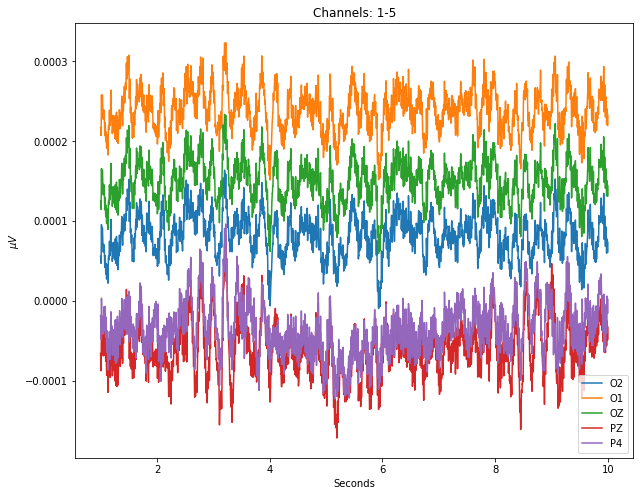

In [7]:
# Extract data from the first 5 channels, from 1 s to 3 s.
sfreq = data_raw.info['sfreq']
sfreq = data_raw.info['sfreq']
data, times = data_raw[:5, int(sfreq * 1):int(sfreq * 10)]

fig = plt.subplots(figsize=(10,8))
plt.plot(times, data.T)
plt.xlabel('Seconds')
plt.ylabel('$\mu V$')
plt.title('Channels: 1-5')
plt.legend(data_raw.ch_names[:5])

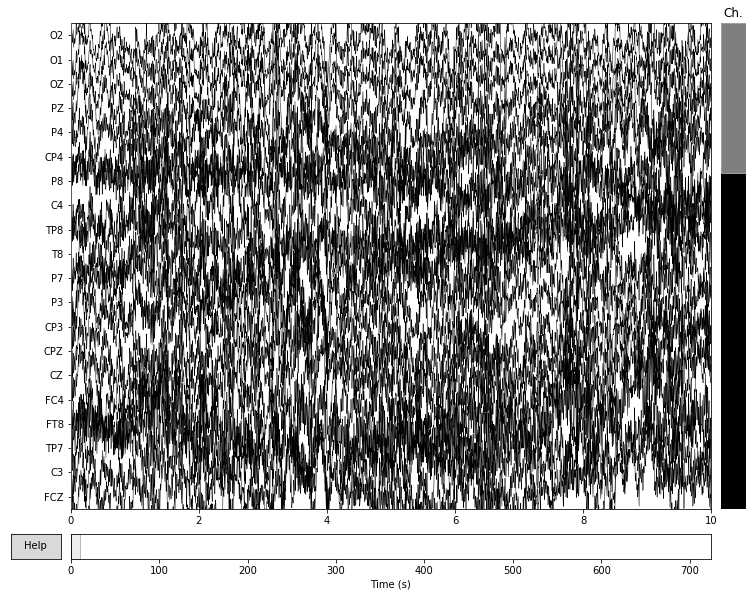

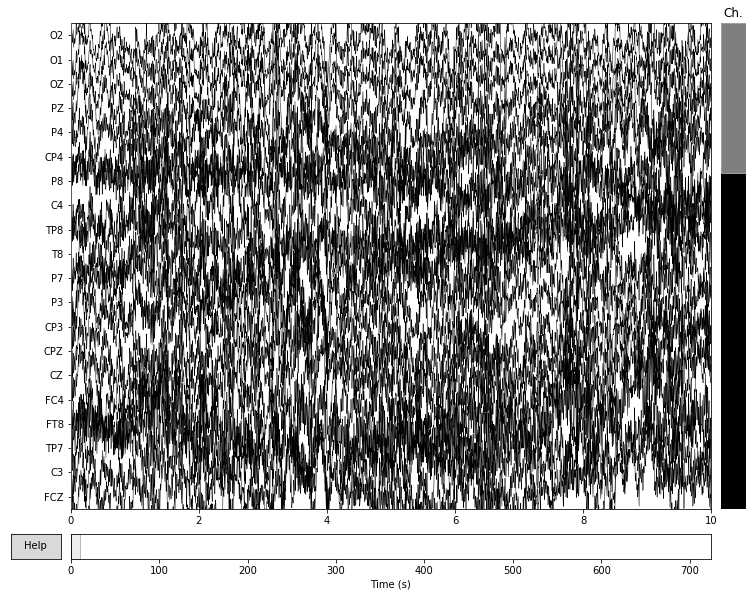

In [11]:
data_raw.plot(duration=10, block=True)

### Look at events 
(encoded in 'STI 014' channel)

In [20]:
# get the events (read from 'STI 014' channel)
events = mne.find_events(data_raw, shortest_event=0, stim_channel='STI 014', verbose=False)
print(events[:10,:])

[[ 331    0    3]
 [1053    0    3]
 [1779    0    3]
 [2497    0    3]
 [3215    0    3]
 [3937    0    3]
 [4659    0   13]
 [5377    0   66]
 [6103    0    3]
 [6825    0    3]]


In [21]:
# Check which unique event indentifiers there are
unique_event_types = set(events[:,2])
print(unique_event_types)

{66, 3, 13}


### Display signal around one type of event
Selects signal for specific event ID and plots time window from tmin to tmax.

Converting time column to int64...


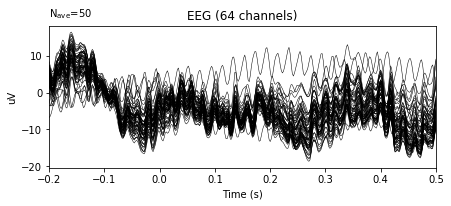

In [45]:
event_id = [3, 13, 66] # select events for the given event IDs
tmin = -0.2  # start of each epoch (200ms before the trigger)
tmax = 0.5  # end of each epoch (500ms after the trigger)

baseline = (None, 0)  # means from the first instant to t = 0
picks = mne.pick_types(data_raw.info, meg=False, eeg=True, stim=False, eog=False,
                   exclude='bads')

epochs = mne.Epochs(data_raw, events, event_id, tmin, tmax, proj=True, picks=picks,
                baseline=baseline, preload=True, verbose=False)

# remove channels that aren't eeg electrodes we care about
#epochs.drop_channels(ch_names=['Nose', 'REOG', 'LEOG', 'IEOG', 'SEOG', 'M1', 'M2','EXG8'])

# Export data in tabular structure as a pandas DataFrame.
epochs_df = epochs.to_data_frame()

evoked = epochs['66'].average()
evoked.plot();

In [38]:
epochs_df.head()

signal                       O2         O1         OZ         PZ         P4  \
condition epoch time                                                          
3         0     -200 -19.470215 -22.935168 -21.250054 -19.701212   3.155850   
                -198 -22.827148 -26.292102 -25.278375 -25.575845  -5.740024   
                -196 -25.512695 -27.970569 -28.299615 -28.093546 -12.789585   
                -194 -27.359009 -28.641956 -29.474542 -30.107706 -19.335605   
                -192 -27.359009 -28.474109 -28.635308 -30.275552 -22.021152   

signal                      CP4        P8         C4        TP8         T8  \
condition epoch time                                                         
3         0     -200  11.950351  5.646961  15.446880  24.409228  38.978652   
                -198   1.879550 -3.081067   4.872539  10.981494  25.383071   
                -196  -7.184170 -8.116467  -5.198261   0.239306  13.633803   
                -194 -16.415738 -9.962781 -14.933369  -6.306714   4.737930   
                -192 -21.954678 -7.780774 -20.472309  -5.299634   2.555923   

signal                ...         F2         F6        FC5         F1  \
condition epoch time  ...                                               
3         0     -200  ...  38.041370  34.097804   4.993854  30.607922   
                -198  ...  26.124255  20.334376  -2.559246  22.047741   
                -196  ...  16.053455   7.913722  -8.937420  15.837414   
                -194  ...   8.668201  -0.478612 -13.804974  12.984021   
                -192  ...   5.814807  -1.989232 -15.819134  12.984021   

signal                      AF4        AF8         F5        AF7        AF3  \
condition epoch time                                                          
3         0     -200  38.342164  19.476862  24.038636  29.993038  38.053002   
                -198  26.928590   7.224055  15.646302  21.097164  28.150048   
                -196  18.032716   2.356501   8.261048  13.879757  19.925561   
                -194  11.151002   4.706354   2.050721   8.172970  14.386621   
                -192   7.122682   8.398981  -0.802673   5.823116  12.876001   

signal                      FPZ  
condition epoch time             
3         0     -200  40.982841  
                -198  30.744194  
                -196  22.855400  
                -194  17.652153  
                -192  16.812919  

[5 rows x 64 columns]

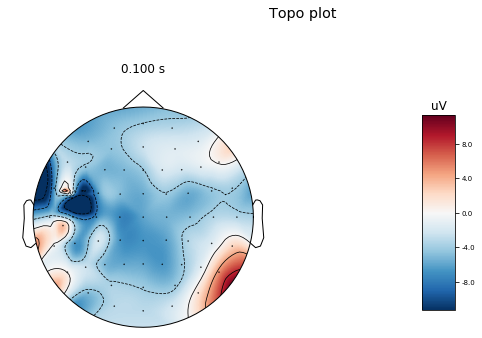

In [39]:
# Spatial plot:
evoked.plot_topomap(times=[0.1], size=3., title="Topo plot", time_unit='s');

### Plot topomaps for different time points

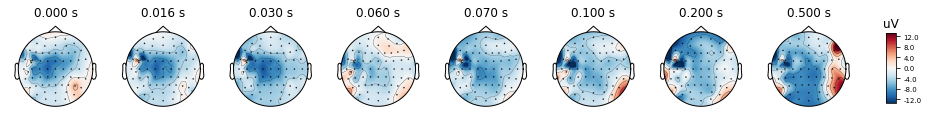

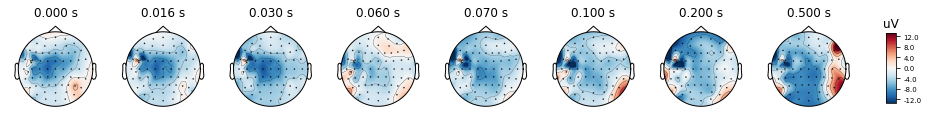

In [46]:
evoked.plot_topomap(times=np.array([0, 0.016, 0.030, 0.060, 0.070, 0.1, 0.2, 0.5]), time_unit='s')

### Test other event type

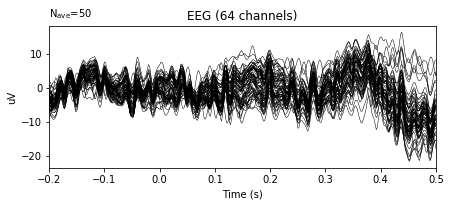

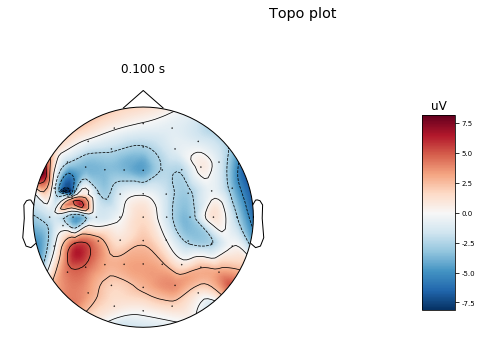

In [40]:
evoked = epochs['13'].average()
evoked.plot();
evoked.plot_topomap(times=[0.1], size=3., title="Topo plot", time_unit='s');

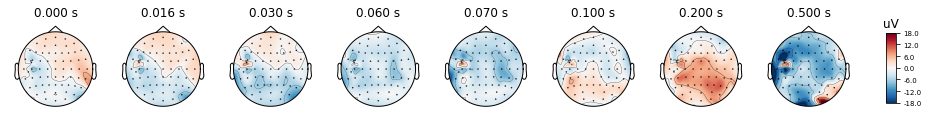

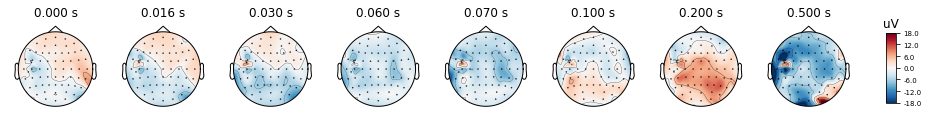

In [44]:
evoked.plot_topomap(times=np.array([0, 0.016, 0.030, 0.060, 0.070, 0.1, 0.2, 0.5]), time_unit='s')